In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('heart_attack_prediction_india.csv')
df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [6]:
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,174.733300,123.872100,49.335500,134.725900,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,71.163447,43.410766,17.399897,25.849077,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,50.000000,50.000000,20.000000,90.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,114.000000,86.000000,34.000000,112.000000,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,174.000000,124.000000,49.000000,135.000000,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,236.000000,161.000000,65.000000,157.000000,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,299.000000,199.000000,79.000000,179.000000,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


In [7]:
df.isna().sum().sum()

0

In [8]:
df_cleaned = df.copy()
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender'], drop_first=True)
df_cleaned.head()

,Patient_ID,State_Name,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk,Gender_Male
0,1,Rajasthan,42,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0,False
1,2,Himachal Pradesh,26,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0,True
2,3,Assam,78,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0,True
3,4,Odisha,58,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0,True
4,5,Karnataka,22,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1,True


In [9]:
df_cleaned['Gender_Male'] = df_cleaned['Gender_Male'].astype(int)
df_cleaned.head()

,Patient_ID,State_Name,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk,Gender_Male
0,1,Rajasthan,42,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0,0
1,2,Himachal Pradesh,26,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0,1
2,3,Assam,78,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0,1
3,4,Odisha,58,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0,1
4,5,Karnataka,22,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1,1


In [10]:
df_cleaned['State_Name'].value_counts()

,count
State_Name,
Chhattisgarh,399
Meghalaya,396
Manipur,394
Kerala,392
Arunachal Pradesh,392
Assam,384
Sikkim,379
Goa,366
Bihar,365


In [11]:
df_cleaned = df_cleaned.drop(columns = ['State_Name', 'Patient_ID'])

In [12]:
df_cleaned.columns

Index(['Age', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking',
       'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score',
       'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level',
       'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk', 'Gender_Male'],
      dtype='object')

In [13]:
column_order = ['Age', 'Gender_Male', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking',
       'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score',
       'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level',
       'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk']
df_cleaned = df_cleaned[column_order]
df_cleaned.head()

,Age,Gender_Male,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,42,0,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0
1,26,1,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0
2,78,1,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0
3,58,1,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0
4,22,1,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1


In [14]:
df_cleaned['Heart_Attack_Risk'].value_counts()

,count
Heart_Attack_Risk,
0,6993
1,3007


In [15]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 23) (2000, 23) (8000,) (2000,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_columns = ['Age', 'Diet_Score',
       'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level',
       'Systolic_BP', 'Diastolic_BP',
        'Stress_Level',
       'Emergency_Response_Time', 'Annual_Income'
        ]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[scale_columns] = scaler.fit_transform(X_train_scaled[scale_columns])
X_test_scaled[scale_columns] = scaler.transform(X_test_scaled[scale_columns])
X_train_scaled.head()

,Age,Gender_Male,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance
2143,0.730599,0,0,0,0,0,1,1,-0.963128,0.146875,1.683276,-0.373402,-0.706412,0.091270,1.243264,0,0,0.526413,0,1,-0.760853,-0.924049,0
2097,-1.706205,1,0,1,0,0,1,0,-0.010283,1.690050,0.700883,1.661217,-1.107782,1.288829,0.610391,0,0,0.178055,1,0,1.514199,-0.391927,0
7523,1.194752,0,0,1,0,0,1,0,-1.280743,-1.557527,1.542934,1.337528,0.038990,-1.647122,-1.460828,1,0,-1.215379,1,0,0.425742,0.662429,0
754,-0.371765,0,0,0,0,0,0,0,-0.010283,-0.889586,-1.558621,1.152562,0.497699,-0.256408,-1.173159,0,1,0.178055,0,1,-0.966054,-1.125421,0
4593,0.208427,0,0,0,0,0,0,0,1.577793,0.538427,0.335994,1.545613,0.497699,-0.758610,-0.770422,1,0,1.571489,0,0,-1.367534,-1.448128,1


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [18]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.509


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      1399
           1       0.30      0.47      0.37       601

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.58      0.51      0.53      2000



In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [21]:
X_train_smote_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()
X_train_smote_scaled[scale_columns] = scaler.fit_transform(X_train_smote_scaled[scale_columns])
X_test_scaled[scale_columns] = scaler.transform(X_test_scaled[scale_columns])

In [22]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_smote_scaled, y_train_smote)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.582


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1399
           1       0.31      0.33      0.32       601

    accuracy                           0.58      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.59      0.58      0.58      2000



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7


In [52]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1399
           1       1.00      0.00      0.00       601

    accuracy                           0.70      2000
   macro avg       0.85      0.50      0.41      2000
weighted avg       0.79      0.70      0.58      2000



In [28]:
feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
21,Annual_Income,0.089944
20,Emergency_Response_Time,0.088856
10,Triglyceride_Level,0.087220
9,Cholesterol_Level,0.083825
11,LDL_Level,0.083284
13,Systolic_BP,0.081583
12,HDL_Level,0.078125
0,Age,0.077820
14,Diastolic_BP,0.076757
8,Diet_Score,0.052416


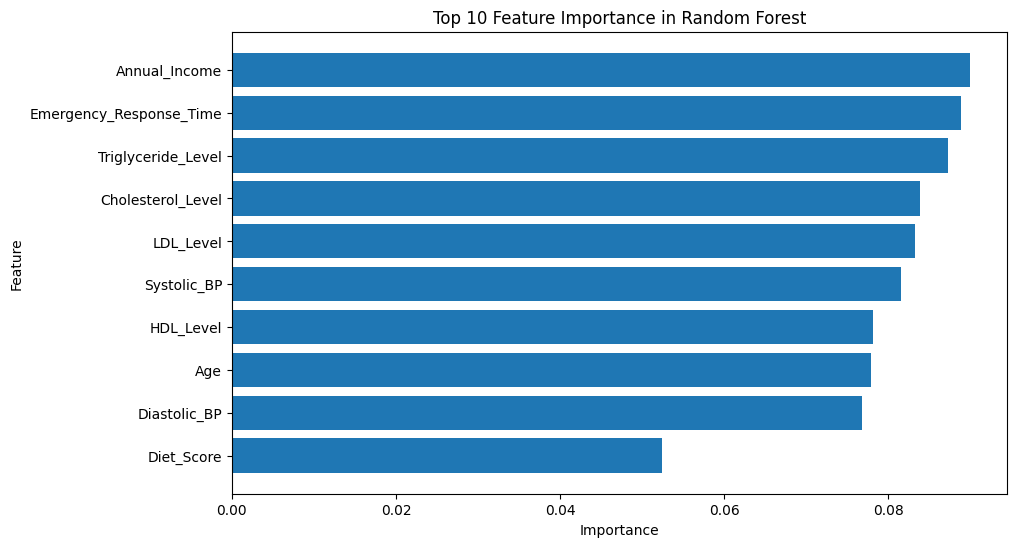

In [29]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [30]:
low_importance_features = ['Diabetes', 'Heart_Attack_History', 'Gender_Male', 'Health_Insurance',
                           'Family_History', 'Smoking', 'Hypertension', 'Obesity']
X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

In [31]:
rf_model.fit(X_train_filtered, y_train)
y_pred_rf = rf_model.predict(X_test_filtered)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.699


In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1399
           1       0.33      0.00      0.00       601

    accuracy                           0.70      2000
   macro avg       0.52      0.50      0.41      2000
weighted avg       0.59      0.70      0.58      2000



In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced_subsample']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_filtered, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_filtered)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1399
           1       0.27      0.12      0.16       601

    accuracy                           0.64      2000
   macro avg       0.48      0.49      0.47      2000
weighted avg       0.57      0.64      0.59      2000



In [35]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)

0.6395


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


mlp_model.fit(X_train_smote_scaled, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6126 - loss: 0.6552 - val_accuracy: 0.6165 - val_loss: 0.6726
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6934 - loss: 0.5879 - val_accuracy: 0.6375 - val_loss: 0.6895
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7070 - loss: 0.5644 - val_accuracy: 0.6360 - val_loss: 0.6794
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7206 - loss: 0.5492 - val_accuracy: 0.6275 - val_loss: 0.7081
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7334 - loss: 0.5296 - val_accuracy: 0.6445 - val_loss: 0.6805
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7431 - loss: 0.5201 - val_accuracy: 0.6435 - val_loss: 0.6898
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7502 - loss: 0.5072 - val_accuracy: 0.6195 - val_loss: 0.7089
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7571 - loss: 0.4958 - val_accuracy: 0.6200 - val_

In [40]:
test_loss, test_accuracy = mlp_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 2.8418
Test Accuracy: 0.5504999756813049


In [41]:
y_pred_prob = mlp_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.64      0.67      1399
           1       0.29      0.34      0.31       601

    accuracy                           0.55      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.57      0.55      0.56      2000



In [54]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train) / sum(y_train == 1)

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1399
           1       0.30      0.34      0.32       601

    accuracy                           0.56      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.58      0.56      0.57      2000

